## Modelos  Predicción de datos de Series Temporales.

## Trafico de Madrid
### (60 estaciones de aforo)

In [1]:
## realizamos predicción a la suma de los 60 aforos diarios en la ciudad.
## el indice que nos da en un dato de la MOVILIDAD del trafico de Madrid.
## día a día.

## Modelo 1. Exponential Smoothing.

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
# buscamos el archivo con los datos y indexamos la fecha.
df = pd.read_csv('TrafMadrid60.csv')
df['FDIA']=pd.to_datetime(df['FDIA'])
df.set_index('FDIA',inplace=True)
df.head()

,ID
FDIA,
2020-01-01,2850036.0
2020-01-02,4552200.0
2020-01-03,4331020.0
2020-01-04,3450572.0
2020-01-05,2931486.0


In [4]:
df.index.freq = 'D'
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2021-07-22', '2021-07-23', '2021-07-24', '2021-07-25',
               '2021-07-26', '2021-07-27', '2021-07-28', '2021-07-29',
               '2021-07-30', '2021-07-31'],
              dtype='datetime64[ns]', name='FDIA', length=578, freq='D')

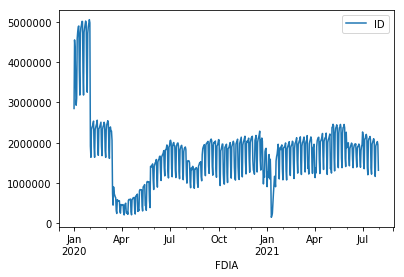

In [5]:
df.plot();

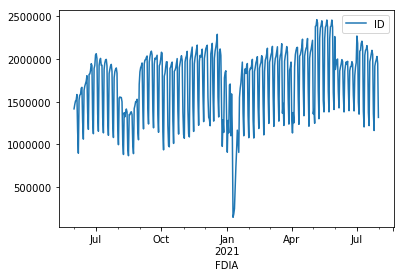

In [6]:
# para una predicción del mes siguiente al último que tenemos,
# no utilizamos los datos antes del 01/06/2021.
df1 = df.iloc[152:]
df1.plot();

In [7]:
len(df1)

426

In [8]:
train = df1.iloc[:395] 
test = df1.iloc[395:]
# el test en con los datos del mes de julio (31 días).

In [9]:
# generamos el modelo.

from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train['ID'],trend='add',seasonal='add', seasonal_periods=7).fit()

test_predictions = fitted_model.forecast(31)
test_predictions

2021-07-01    1.970747e+06
2021-07-02    1.970110e+06
2021-07-03    1.423828e+06
2021-07-04    1.209982e+06
2021-07-05    1.840638e+06
2021-07-06    1.930510e+06
2021-07-07    1.985999e+06
2021-07-08    1.989044e+06
2021-07-09    1.988407e+06
2021-07-10    1.442125e+06
2021-07-11    1.228279e+06
2021-07-12    1.858935e+06
2021-07-13    1.948807e+06
2021-07-14    2.004296e+06
2021-07-15    2.007342e+06
2021-07-16    2.006704e+06
2021-07-17    1.460422e+06
2021-07-18    1.246576e+06
2021-07-19    1.877233e+06
2021-07-20    1.967104e+06
2021-07-21    2.022593e+06
2021-07-22    2.025639e+06
2021-07-23    2.025001e+06
2021-07-24    1.478720e+06
2021-07-25    1.264874e+06
2021-07-26    1.895530e+06
2021-07-27    1.985401e+06
2021-07-28    2.040890e+06
2021-07-29    2.043936e+06
2021-07-30    2.043299e+06
2021-07-31    1.497017e+06
Freq: D, dtype: float64

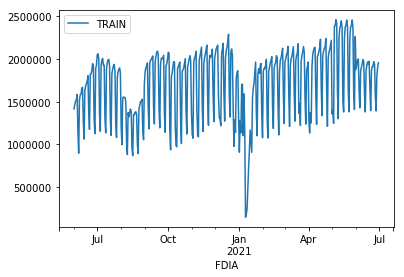

In [10]:
# pintamos los resultados en varias graficas para ver la previsión mejor.
train['ID'].plot(legend=True,label='TRAIN')

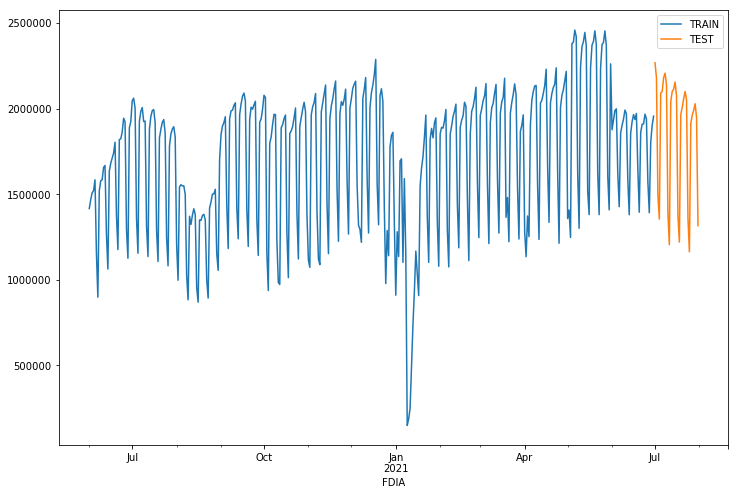

In [11]:
train['ID'].plot(legend=True,label='TRAIN',figsize=(12,8))
test['ID'].plot(legend=True,label='TEST')

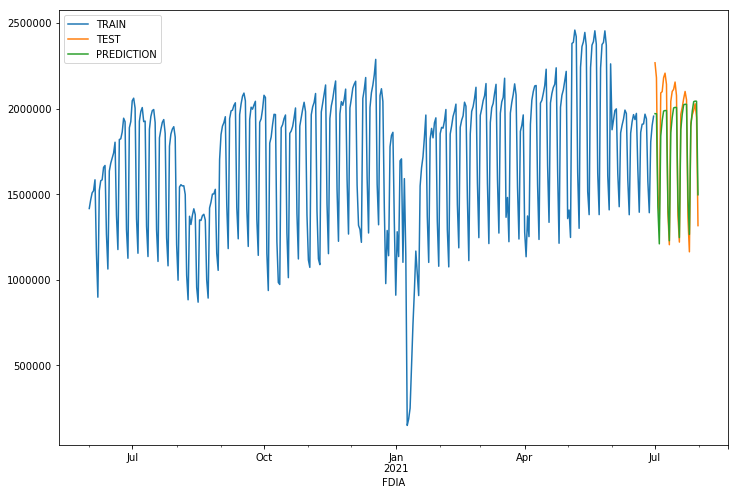

In [12]:
train['ID'].plot(legend=True,label='TRAIN',figsize=(12,8))
test['ID'].plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION');

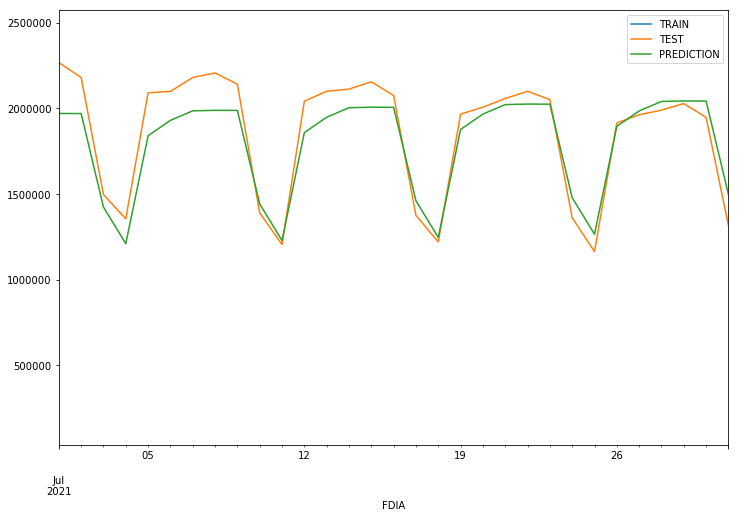

In [13]:
# pintamos los datos de predicción en el mes de julio.
train['ID'].plot(legend=True,label='TRAIN')
test['ID'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2021-07-01','2021-07-31']);

In [14]:
# evaluamos la métrica de los resultados.
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test['ID'],test_predictions)

110662.69081987257

In [15]:
test['ID'].describe()

count    3.100000e+01
mean     1.857085e+06
std      3.613200e+05
min      1.163426e+06
25%      1.443442e+06
50%      2.028680e+06
75%      2.100486e+06
max      2.267918e+06
Name: ID, dtype: float64

In [18]:
np.sqrt(mean_squared_error(test['ID'],test_predictions))

130749.64585119145

In [16]:
# error sqrt. respecto a la media del valor de los datos.
130749*100/1857085

7.040550109445717

In [20]:
# el error en la predicción del test es del 7.0%, es un poco alto para el tipo
# de datos que manejamos.
# la verdad que el problema del COVID y la estacionalidad de verano hace que
# sea dificil las series de predicción de tráfico este año.

In [18]:
# predecimos los datos con este modelo para agosto. con este error.

fitted_pred31 = ExponentialSmoothing(df1['ID'],trend='add',seasonal='add', seasonal_periods=7).fit()

pred31 = fitted_pred31.forecast(31)
pred31

2021-08-01    1.152638e+06
2021-08-02    1.794346e+06
2021-08-03    1.883426e+06
2021-08-04    1.926066e+06
2021-08-05    1.940698e+06
2021-08-06    1.921478e+06
2021-08-07    1.375100e+06
2021-08-08    1.166517e+06
2021-08-09    1.808225e+06
2021-08-10    1.897305e+06
2021-08-11    1.939946e+06
2021-08-12    1.954578e+06
2021-08-13    1.935358e+06
2021-08-14    1.388979e+06
2021-08-15    1.180397e+06
2021-08-16    1.822105e+06
2021-08-17    1.911185e+06
2021-08-18    1.953826e+06
2021-08-19    1.968457e+06
2021-08-20    1.949237e+06
2021-08-21    1.402859e+06
2021-08-22    1.194277e+06
2021-08-23    1.835985e+06
2021-08-24    1.925065e+06
2021-08-25    1.967705e+06
2021-08-26    1.982337e+06
2021-08-27    1.963117e+06
2021-08-28    1.416739e+06
2021-08-29    1.208156e+06
2021-08-30    1.849864e+06
2021-08-31    1.938944e+06
Freq: D, dtype: float64

In [19]:
# guardamos los datos de predicción de trafico en el mes de agosto.modelo 1.

pred31.to_csv('Pred08Mod1trafMadrid60.csv')

## Modelo 2. SARIMAX

In [7]:
# al tener modelos más complejos, retiramos los avisos warnings.
import warnings
warnings.filterwarnings("ignore")

In [8]:
# los datos ya los tenemos en 'df', y del mismo modo trabajamos con 'df1'
# datos desde el 01/06/2020 (asi no influye la bajada de trafico del periodo de
# alarma de covid en marzo-abril-mayo de 2020)

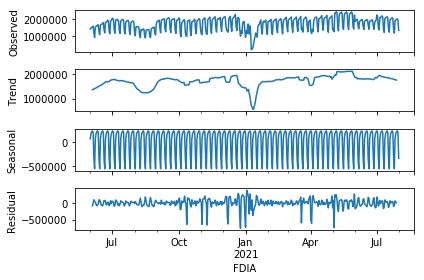

In [9]:
# representamos la descomposición estacional.
from statsmodels.tsa.seasonal import seasonal_decompose 

result = seasonal_decompose(df1['ID'])
result.plot();

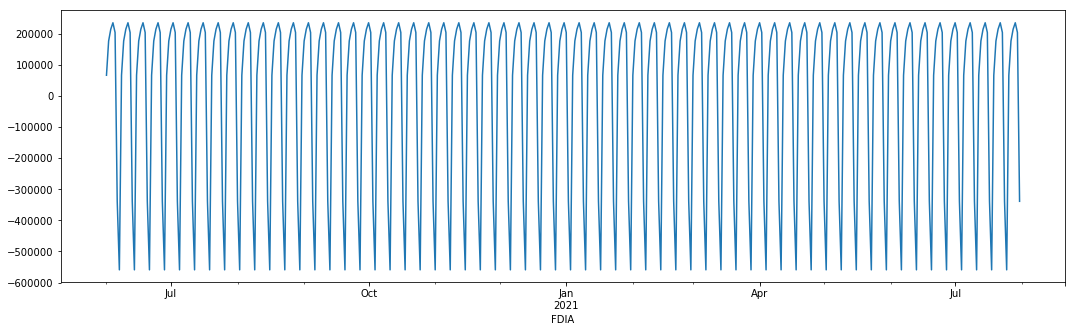

In [10]:
# puede que haya estacinalidad a nivel semanal.
result.seasonal.plot(figsize=(18,5));

In [11]:
len(df1)

426

In [12]:
# vamos a pronosticar los datos de julio2021. 31 días.
# realizamos los archivos de 'train' y 'test', este último es el mes de junio.
# retiramos datos antes de mayo2021, para que no influya los datos del covid.
train = df1.iloc[:395]
test = df1.iloc[395:]

In [13]:
# 1º pronostico. Modelo SARIMA. Obtenemos valores del modelo.
from pmdarima import auto_arima 

auto_arima(df1['ID'],seasonal=True,m=7).summary()

C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 2) seasonal_order=(2, 0, 1, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 2, 7); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\ahija\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Un

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  426
Model:             SARIMAX(2, 1, 1)x(1, 0, 2, 7)   Log Likelihood               -5883.771
Date:                           Sun, 12 Sep 2021   AIC                          11783.542
Time:                                   13:26:23   BIC                          11815.958
Sample:                                        0   HQIC                         11796.348
                                           - 426                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    199.8530    832.675      0.240      0.810   -1432.160    1831.866
ar.L1          0.4497      0.245      1.834      0.067      -0.031       0.930
ar.L2         -0.0325      0.165     -0.197      0.844      -0.356       0.291
ma.L1         -0.7908      0.234     -3.385      0.001      -1.249      -0.333
ar.S.L7        0.9930      0.013     79.427      0.000       0.968       1.017
ma.S.L7       -0.7742      0.114     -6.773      0.000      -0.998      -0.550
ma.S.L14      -0.1318      0.132     -0.995      0.320      -0.391       0.128
sigma2      1.241e+11   1.46e-05   8.53e+15      0.000    1.24e+11    1.24e+11
===================================================================================
Ljung-Box (Q):                       39.58   Jarque-Bera (JB):               633.25
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                            -0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.14e+31. Standard errors may be unstable.
"""

In [14]:
# ahora generamos nuestro modelo utilizando los indicadores de SARIMAX.

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['ID'],order=(2,1,1),seasonal_order=(1,0,2,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                ID   No. Observations:                  395
Model:             SARIMAX(2, 1, 1)x(1, 0, 2, 7)   Log Likelihood               -5456.711
Date:                           Sun, 12 Sep 2021   AIC                          10927.422
Time:                                   13:27:22   BIC                          10955.257
Sample:                               06-01-2020   HQIC                         10938.452
                                    - 06-30-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6481      0.097      6.680      0.000       0.458       0.838
ar.L2          0.1095      0.122      0.896      0.370      -0.130       0.349
ma.L1         -0.9971      0.014    -71.709      0.000      -1.024      -0.970
ar.S.L7        0.9939      0.012     83.599      0.000       0.971       1.017
ma.S.L7       -0.7356      0.112     -6.539      0.000      -0.956      -0.515
ma.S.L14      -0.1716      0.135     -1.268      0.205      -0.437       0.094
sigma2      1.238e+11   5.35e-13   2.31e+23      0.000    1.24e+11    1.24e+11
===================================================================================
Ljung-Box (Q):                       45.02   Jarque-Bera (JB):               674.68
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):               3.34   Skew:                            -1.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.51e+38. Standard errors may be unstable.
"""

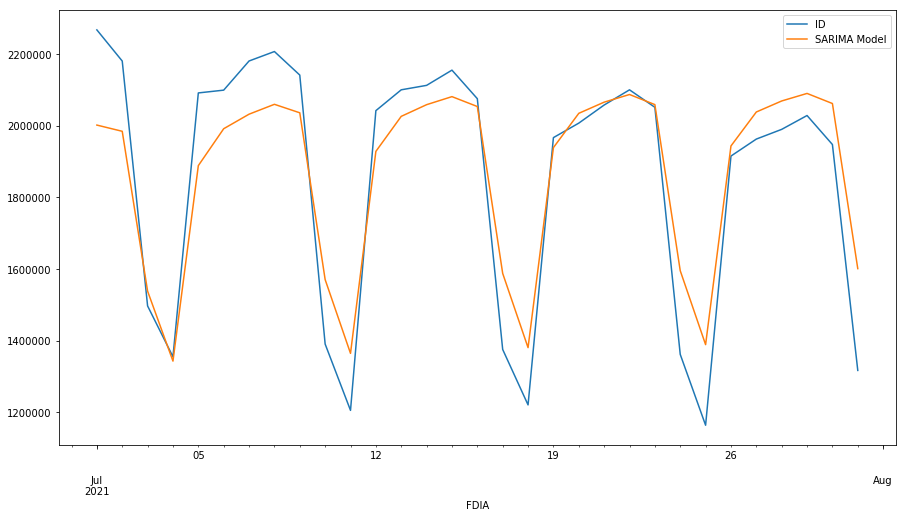

In [15]:
# predecimos los valores (últimos 31 dias, corresponde a datos de juLio)
start=len(train)
end=len(train)+len(test)-1

predictions = results.predict(start,end).rename('SARIMA Model')

# y lo pintamos junto a los datos reales del 'test'
test['ID'].plot(legend=True,figsize=(15,8))
predictions.plot(legend=True)

In [16]:
# evaluo las métricas de los resultados
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test['ID'],predictions)

111751.04304237003

In [17]:
test['ID'].describe()

count    3.100000e+01
mean     1.857085e+06
std      3.613200e+05
min      1.163426e+06
25%      1.443442e+06
50%      2.028680e+06
75%      2.100486e+06
max      2.267918e+06
Name: ID, dtype: float64

In [18]:
np.sqrt(mean_squared_error(test['ID'],predictions))

138258.30636112462

In [19]:
# error sqrt.
138258*100/1857085

7.444893475527507

In [20]:
# el error en la predicción del test es del 7,4%, un poco peor que el modelo
# anterior, pero similar.
# la verdad que el problema del COVID y la estacionalidad de verano hace que
# sea dificil las series de predicción de tráfico este año.

# vamos a seguir estudiando otros modelos y elegimos aquel que nos de mejor
# predicción en el test, para realizar la PREDICCIÓN del MES siguiente: AGOSTO.

In [20]:
# predecimos los datos con este modelo para agosto. modelo 2.
dias= 31

model2 = SARIMAX(df1['ID'],order=(2,1,1),seasonal_order=(2,0,1,7),enforce_invertibility=False)
predic2 = model2.fit()
start=len(df1)
end=len(df1)+dias-1

predicmodel2 = predic2.predict(start,end).rename('SARIMA Model')
predicmodel2


2021-08-01    1.173266e+06
2021-08-02    1.838471e+06
2021-08-03    1.937475e+06
2021-08-04    1.987384e+06
2021-08-05    2.038548e+06
2021-08-06    1.999523e+06
2021-08-07    1.459948e+06
2021-08-08    1.283143e+06
2021-08-09    1.906899e+06
2021-08-10    1.997752e+06
2021-08-11    2.038145e+06
2021-08-12    2.080745e+06
2021-08-13    2.041965e+06
2021-08-14    1.516681e+06
2021-08-15    1.328608e+06
2021-08-16    1.937357e+06
2021-08-17    2.023061e+06
2021-08-18    2.058921e+06
2021-08-19    2.097711e+06
2021-08-20    2.057669e+06
2021-08-21    1.536300e+06
2021-08-22    1.345802e+06
2021-08-23    1.948314e+06
2021-08-24    2.032078e+06
2021-08-25    2.066446e+06
2021-08-26    2.103973e+06
2021-08-27    2.063583e+06
2021-08-28    1.544938e+06
2021-08-29    1.354566e+06
2021-08-30    1.953231e+06
2021-08-31    2.036165e+06
Freq: D, Name: SARIMA Model, dtype: float64

In [21]:
# guardamos los datos de predicción de trafico en el mes de agosto.modelo 2.

predicmodel2.to_csv('Pred08Mod2trafMadrid60.csv')

## Modelo 3. RNN

In [8]:
# uso de redes neuronales para predecir datos de una serie temporal

# ya tengo la base de datos 'df', reducida a 'df1' para el trabajo.
df1.head()

,ID
FDIA,
2020-06-01,1416433.0
2020-06-02,1467039.0
2020-06-03,1507697.0
2020-06-04,1520346.0
2020-06-05,1584289.0


In [9]:
# definimos nuestros paquetes de datos de entrenamiento y test.
# realmente ya los tenemos definidos de los modelos anteriores, pero por si acaso.
len(df1)

426

In [10]:
# tomamos 31 dias de test (7,3% de los datos)
train = df1.iloc[:395]
test = df1.iloc[395:]
test

,ID
FDIA,
2021-07-01,2267918.0
2021-07-02,2180866.0
2021-07-03,1496676.0
2021-07-04,1354725.0
2021-07-05,2091792.0
2021-07-06,2099571.0
2021-07-07,2181017.0
2021-07-08,2207429.0
2021-07-09,2141681.0


In [11]:
# normalizamos los datos entre 0 y 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [12]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [13]:
# ahora generamos el modelo con RNN
from keras.preprocessing.sequence import TimeseriesGenerator
scaled_test

array([[0.91725829],
       [0.87957396],
       [0.58339192],
       [0.52194212],
       [0.84101432],
       [0.84438181],
       [0.87963933],
       [0.89107294],
       [0.86261099],
       [0.53730208],
       [0.45709453],
       [0.81958302],
       [0.84478916],
       [0.85016355],
       [0.86858321],
       [0.83405035],
       [0.53076321],
       [0.46373124],
       [0.78696486],
       [0.80449145],
       [0.82638725],
       [0.84476709],
       [0.82365439],
       [0.52481914],
       [0.43912985],
       [0.76467815],
       [0.78521207],
       [0.79695303],
       [0.81369349],
       [0.77863207],
       [0.50541421]])

In [14]:
# creamos el modelo.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [15]:
# definimos el modelo RNN, con la estacionalidad semanal.
n_input = 7
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit_generator(generator,epochs=25)

C:\Users\ahija\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
388/388 [==============================] - 2s 3ms/step - loss: 0.0354
Epoch 2/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0195
Epoch 3/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0163
Epoch 4/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0147
Epoch 5/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0134
Epoch 6/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0141
Epoch 7/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0128
Epoch 8/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0126
Epoch 9/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0119
Epoch 10/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0115
Epoch 11/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0111
Epoch 12/25
388/388 [==============================] - 1s 3ms/step - loss: 0.0115
Epoch 13/25
388/388 [====

In [18]:
model.history.history.keys()

dict_keys(['loss'])

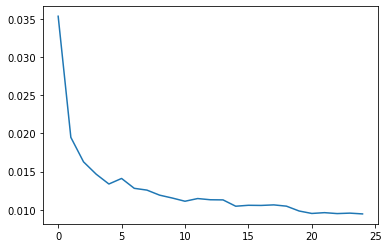

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(len(model.history.history['loss'])),model.history.history['loss'])

In [20]:
# vemos que el error de predicción baja hasta 0

In [21]:
# hacemos ahora la predicción usando el modelo RNN
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    
    # y volvemos a ejecutar

In [22]:
# ahora tengo mis datos de test_predictions
test_predictions

[array([0.79873], dtype=float32),
 array([0.7853042], dtype=float32),
 array([0.6563324], dtype=float32),
 array([0.5514873], dtype=float32),
 array([0.70484877], dtype=float32),
 array([0.78155255], dtype=float32),
 array([0.79602885], dtype=float32),
 array([0.8085586], dtype=float32),
 array([0.7970933], dtype=float32),
 array([0.6931112], dtype=float32),
 array([0.57348055], dtype=float32),
 array([0.702276], dtype=float32),
 array([0.7931994], dtype=float32),
 array([0.807338], dtype=float32),
 array([0.81842697], dtype=float32),
 array([0.80897987], dtype=float32),
 array([0.7282157], dtype=float32),
 array([0.6038551], dtype=float32),
 array([0.7042148], dtype=float32),
 array([0.8021915], dtype=float32),
 array([0.8175098], dtype=float32),
 array([0.8280554], dtype=float32),
 array([0.82097864], dtype=float32),
 array([0.76032364], dtype=float32),
 array([0.64242935], dtype=float32),
 array([0.713688], dtype=float32),
 array([0.81088114], dtype=float32),
 array([0.82782066], dt

In [23]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[1994113.89575386],
       [1963099.80569649],
       [1665170.78569603],
       [1422975.37209129],
       [1777245.20537567],
       [1954433.40752029],
       [1987874.12211227],
       [2016818.2012043 ],
       [1990332.96578789],
       [1750131.00826645],
       [1473780.41373348],
       [1771302.01305771],
       [1981338.04252434],
       [2013998.61330032],
       [2039614.48266411],
       [2017791.38448906],
       [1831223.55702972],
       [1543946.54303646],
       [1775780.74903488],
       [2002110.02564621],
       [2037495.72992134],
       [2061856.42967224],
       [2045508.93320465],
       [1905393.94726753],
       [1633054.3604126 ],
       [1797664.15483284],
       [2022183.37662506],
       [2061314.2118206 ],
       [2084913.49341011],
       [2073759.06156731],
       [1968985.168787  ]])

In [24]:
test['predictions'] = true_predictions

<ipython-input-24-fa6c3af7c69f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_predictions


In [25]:
test

,ID,predictions
FDIA,,
2021-07-01,2267918.0,1.994114e+06
2021-07-02,2180866.0,1.963100e+06
2021-07-03,1496676.0,1.665171e+06
2021-07-04,1354725.0,1.422975e+06
2021-07-05,2091792.0,1.777245e+06
2021-07-06,2099571.0,1.954433e+06
2021-07-07,2181017.0,1.987874e+06
2021-07-08,2207429.0,2.016818e+06
2021-07-09,2141681.0,1.990333e+06


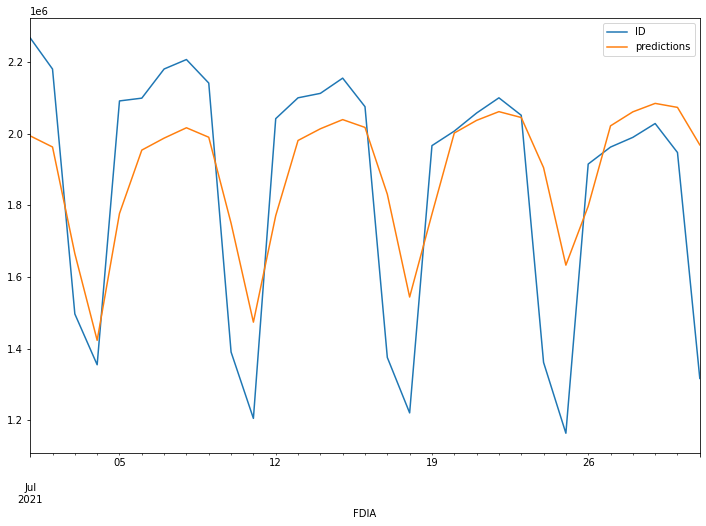

In [26]:
test.plot(figsize=(12,8))

In [27]:
# evaluo las métricas de los resultados
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(test['ID'],test['predictions'])

198487.19799823145

In [28]:
test['ID'].describe()

count    3.100000e+01
mean     1.857085e+06
std      3.613200e+05
min      1.163426e+06
25%      1.443442e+06
50%      2.028680e+06
75%      2.100486e+06
max      2.267918e+06
Name: ID, dtype: float64

In [29]:
np.sqrt(mean_squared_error(test['ID'],test['predictions']))

255461.35644708382

In [30]:
# error sqrt.
255461*100/1857085

13.756020860649889

In [36]:
# en este caso el error de predicción es mayor, hasta un 13.8% que los modelos
# anteriores.

## Modelo 4. Facebook's Prophet

In [54]:
# Usamos la bibliote de predicciones de la libreria de Facebook.
# diseñada para conjunto de datos comerciales comunes en Facebook.

In [23]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [24]:
# realizamos la carga del archivo
df = pd.read_csv('TrafMadrid60.csv')

In [25]:
# cambiamos la columna de FDIA al formato datatime y lo pasamos a indice, 
df.columns = ['ds','y']
df['ds']=pd.to_datetime(df['ds'])

In [26]:
df1 = df.iloc[152:]
df1.head()

,ds,y
152,2020-06-01,1416433.0
153,2020-06-02,1467039.0
154,2020-06-03,1507697.0
155,2020-06-04,1520346.0
156,2020-06-05,1584289.0


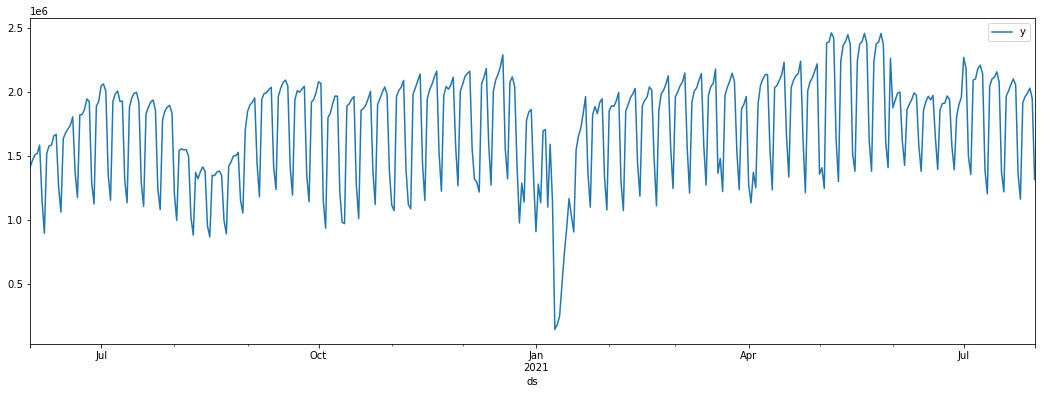

In [27]:
df1.plot(x='ds',y='y',figsize=(18,6))

In [28]:
len(df1)

426

In [29]:
train = df1.iloc[:395]
test = df1.iloc[395:]

In [30]:
# genero el modelo de predicción
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=31,freq='D')
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
421,2021-07-27,2.007983e+06,1.846343e+06,2.534716e+06,2.006506e+06,2.009481e+06,174353.076986,174353.076986,174353.076986,174353.076986,174353.076986,174353.076986,0.0,0.0,0.0,2.182336e+06
422,2021-07-28,2.009692e+06,1.861108e+06,2.566682e+06,2.008123e+06,2.011334e+06,211463.117674,211463.117674,211463.117674,211463.117674,211463.117674,211463.117674,0.0,0.0,0.0,2.221155e+06
423,2021-07-29,2.011401e+06,1.892050e+06,2.574616e+06,2.009684e+06,2.013109e+06,231162.977707,231162.977707,231162.977707,231162.977707,231162.977707,231162.977707,0.0,0.0,0.0,2.242564e+06
424,2021-07-30,2.013110e+06,1.874385e+06,2.531985e+06,2.011331e+06,2.014907e+06,202858.257618,202858.257618,202858.257618,202858.257618,202858.257618,202858.257618,0.0,0.0,0.0,2.215968e+06
425,2021-07-31,2.014819e+06,1.322474e+06,2.024484e+06,2.012892e+06,2.016702e+06,-328174.191365,-328174.191365,-328174.191365,-328174.191365,-328174.191365,-328174.191365,0.0,0.0,0.0,1.686645e+06


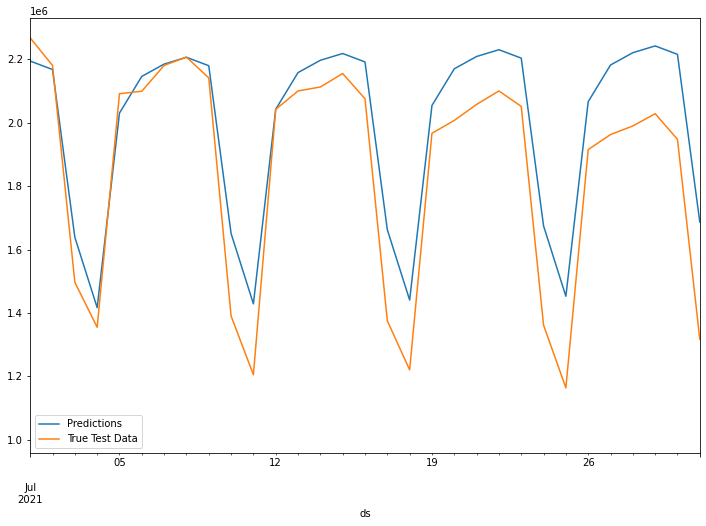

In [32]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('2021-07-01','2021-07-31'))

In [33]:
# evaluamos la predicción
from statsmodels.tools.eval_measures import rmse

predictions = forecast.iloc[-31:]['yhat']
predictions

395    2.194709e+06
396    2.168113e+06
397    1.638790e+06
398    1.416680e+06
399    2.030712e+06
400    2.146444e+06
401    2.185264e+06
402    2.206673e+06
403    2.180077e+06
404    1.650754e+06
405    1.428644e+06
406    2.042676e+06
407    2.158408e+06
408    2.197227e+06
409    2.218636e+06
410    2.192041e+06
411    1.662717e+06
412    1.440608e+06
413    2.054639e+06
414    2.170372e+06
415    2.209191e+06
416    2.230600e+06
417    2.204004e+06
418    1.674681e+06
419    1.452571e+06
420    2.066603e+06
421    2.182336e+06
422    2.221155e+06
423    2.242564e+06
424    2.215968e+06
425    1.686645e+06
Name: yhat, dtype: float64

In [34]:
test['y']

547    2267918.0
548    2180866.0
549    1496676.0
550    1354725.0
551    2091792.0
552    2099571.0
553    2181017.0
554    2207429.0
555    2141681.0
556    1390207.0
557    1204925.0
558    2042285.0
559    2100512.0
560    2112927.0
561    2155477.0
562    2075705.0
563    1375102.0
564    1220256.0
565    1966936.0
566    2007423.0
567    2058003.0
568    2100461.0
569    2051690.0
570    1361371.0
571    1163426.0
572    1915453.0
573    1962887.0
574    1990009.0
575    2028680.0
576    1947687.0
577    1316545.0
Name: y, dtype: float64

In [35]:
rmse(predictions,test['y'])

177100.75273694613

In [36]:
test.mean()

y    1.857085e+06
dtype: float64

In [37]:
# % de error sobre la media (comparación valores)
177101*100/1857085

9.5365047911108

In [38]:
# la predicción del error es del 9,5%, es un valor más alto que el modelo 2.
# al observar los valores.
# pero los valores de predicción son más altos que el test. por lo que en 
# nuestro caso particular puede ser útil por estar en el lado de la seguridad
# para la información aportada.

## Predicción de datos de Agosto con Modelo 4. Prophet.

In [39]:
# calculo de predicción con este modelo.
m = Prophet()
m.fit(df1)
future_ago = m.make_future_dataframe(periods=31,freq='D')
forecast_ago = m.predict(future_ago)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
predictions_ago = forecast_ago.iloc[-31:]['yhat']
predictions_ago

426    1.388003e+06
427    2.012785e+06
428    2.123312e+06
429    2.162139e+06
430    2.185536e+06
431    2.154810e+06
432    1.610942e+06
433    1.396768e+06
434    2.021551e+06
435    2.132077e+06
436    2.170904e+06
437    2.194302e+06
438    2.163576e+06
439    1.619707e+06
440    1.405534e+06
441    2.030317e+06
442    2.140843e+06
443    2.179670e+06
444    2.203067e+06
445    2.172341e+06
446    1.628473e+06
447    1.414300e+06
448    2.039082e+06
449    2.149609e+06
450    2.188435e+06
451    2.211833e+06
452    2.181107e+06
453    1.637239e+06
454    1.423065e+06
455    2.047848e+06
456    2.158374e+06
Name: yhat, dtype: float64

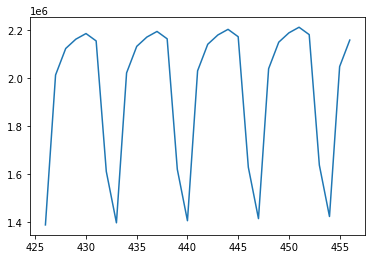

In [41]:
# representamos los valores de la predicción:
predictions_ago.plot()

In [42]:
# guardamos los datos de predicción de trafico en el mes de agosto.

predictions_ago.to_csv('Pred08Mod4trafMadrid60.csv')

In [43]:
# trabajo terminado. Hemos utilizado 4 modelos y guardado 3 archivos para 
# visualizarlos despues y elegir el mejor para el uso de los datos predichos
# para el mes de agosto 2031.

In [44]:
# Trabajo de Mariano Ahijado García. TFM VIU. Master Big Data 2020-21.